## 1.  Initiate Packages

In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np

## 2.  Grab stock data/prices and print data
#### * please note: stock prices are based on daily adjusted closing prices

In [2]:
from datetime import datetime
import yfinance as yf
yf.pdr_override() 
from pandas_datareader import data as pdr

#* This function will return a pd dataframe with all of the adjusted closing information
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data,pdr.get_data_yahoo(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4]], axis = 1)
        names.append(i)
    data.columns = names
    return data

#*  The ticker names of the companies that we will be looking at.
ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FE", "META","BRK-B", "MSFT"]
stockData = get_historical_Data(ticks)
print(stockData.shape)

#* Most Recent Data
stockData.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FE,META,BRK-B,MSFT
2021-10-20 00:00:00-04:00,452.347168,147.956543,142.414993,116.389999,46.130001,443.628998,625.140015,216.169998,143.164062,65.800003,395.319092,60.136555,156.484451,35.216507,340.779999,287.489990,303.240570
2021-10-21 00:00:00-04:00,461.599670,148.174622,142.780502,119.330002,45.427502,444.786102,653.159973,214.339996,143.958328,65.400002,395.028351,59.044018,160.168167,35.122166,341.880005,286.820007,306.545105
2021-10-22 00:00:00-04:00,458.019012,147.391541,138.625000,119.820000,42.450001,444.325195,664.780029,212.970001,145.458603,62.240002,401.550934,59.449009,161.452042,35.612724,324.609985,289.239990,304.966858
2021-10-25 00:00:00-04:00,459.903046,147.341965,138.772995,122.360001,43.492500,446.708069,671.659973,212.869995,147.145203,62.110001,401.967682,60.607479,162.182877,35.254242,328.690002,290.260010,303.950836
2021-10-26 00:00:00-04:00,459.449310,148.016037,139.671997,122.930000,44.459999,447.110107,668.520020,209.809998,145.860641,61.430000,404.739502,62.010818,161.758209,35.565556,315.809998,290.850006,305.903870


## 3.  Securities Correlation

In [3]:
corr_matrix = stockData.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FE,META,BRK-B,MSFT
DPZ,1.000000,0.818148,0.874797,0.665388,0.469130,0.834557,0.372663,0.080836,0.407599,0.336258,0.724772,0.497005,0.812071,0.747344,0.938272,0.715105,0.872942
AAPL,0.818148,1.000000,0.817185,0.788684,0.430274,0.832325,0.659198,0.095350,0.373089,0.490575,0.729216,0.498231,0.862453,0.645400,0.761094,0.608197,0.886737
GOOG,0.874797,0.817185,1.000000,0.572945,0.717871,0.978253,0.542024,0.332867,0.120376,0.604391,0.933673,0.794650,0.729426,0.909977,0.919678,0.901955,0.974893
AMD,0.665388,0.788684,0.572945,1.000000,0.076881,0.555607,0.697511,-0.128145,0.555587,0.219452,0.447324,0.182714,0.814614,0.289562,0.522507,0.288319,0.681377
GME,0.469130,0.430274,0.717871,0.076881,1.000000,0.737520,0.240664,0.562551,-0.303936,0.553100,0.803210,0.823951,0.303382,0.815796,0.631324,0.800656,0.647865
SPY,0.834557,0.832325,0.978253,0.555607,0.737520,1.000000,0.532301,0.442483,0.118445,0.630425,0.964367,0.844584,0.731238,0.920140,0.887417,0.932636,0.955292
NFLX,0.372663,0.659198,0.542024,0.697511,0.240664,0.532301,1.000000,-0.031222,0.105738,0.386304,0.480084,0.369577,0.502257,0.310466,0.347908,0.301593,0.651469
BA,0.080836,0.095350,0.332867,-0.128145,0.562551,0.442483,-0.031222,1.000000,-0.313237,0.534617,0.510482,0.671750,0.079400,0.463653,0.260697,0.568068,0.229572
WMT,0.407599,0.373089,0.120376,0.555587,-0.303936,0.118445,0.105738,-0.313237,1.000000,-0.395426,-0.044592,-0.326004,0.399258,-0.084901,0.280621,-0.007303,0.187105
TWTR,0.336258,0.490575,0.604391,0.219452,0.553100,0.630425,0.386304,0.534617,-0.395426,1.000000,0.666863,0.704388,0.464564,0.628792,0.439769,0.564449,0.600566


## 4.  Convert Correlation Into Heat Map
##### * based on an intial observation of the correlation data and heat map, there is a correlation between S&P 500 and Google

<AxesSubplot:>

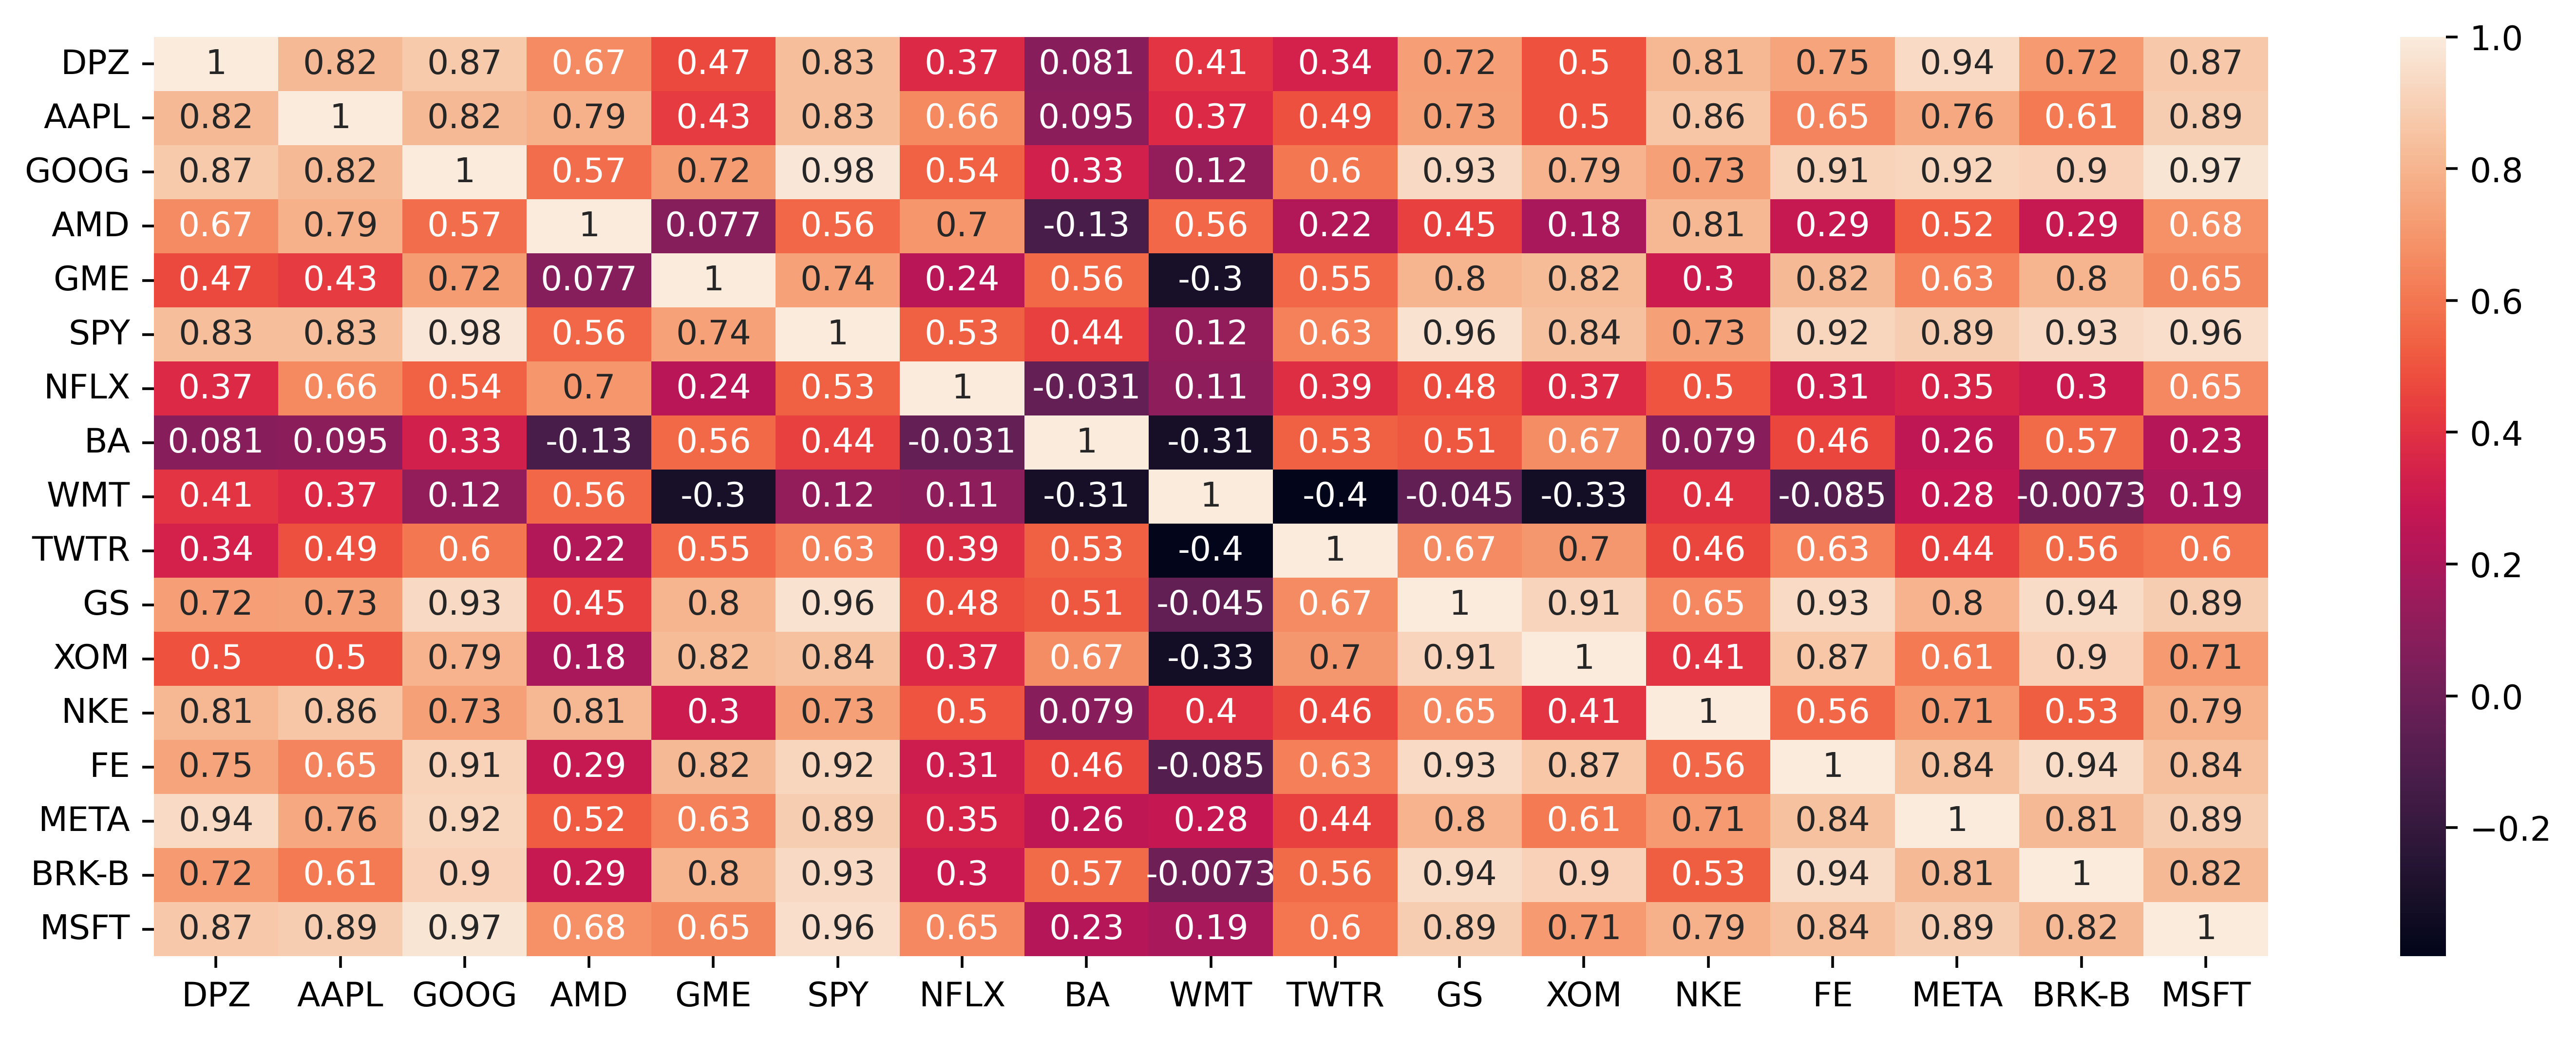

In [4]:

# * converted the correlation above to a heat map
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(14, 5), dpi=500)
sn.heatmap(corr_matrix, annot = True)

## 5. Comparing Securities
#### * I will use another pair of securities instead of Google(GOOG) and SPDR S&P 500 ETF(SPY) as the data needs to be standardized.
#### * I will utilize another pair of securities.  I will utilize BRK-B and MSFT as the two securities are more inline with each other.  

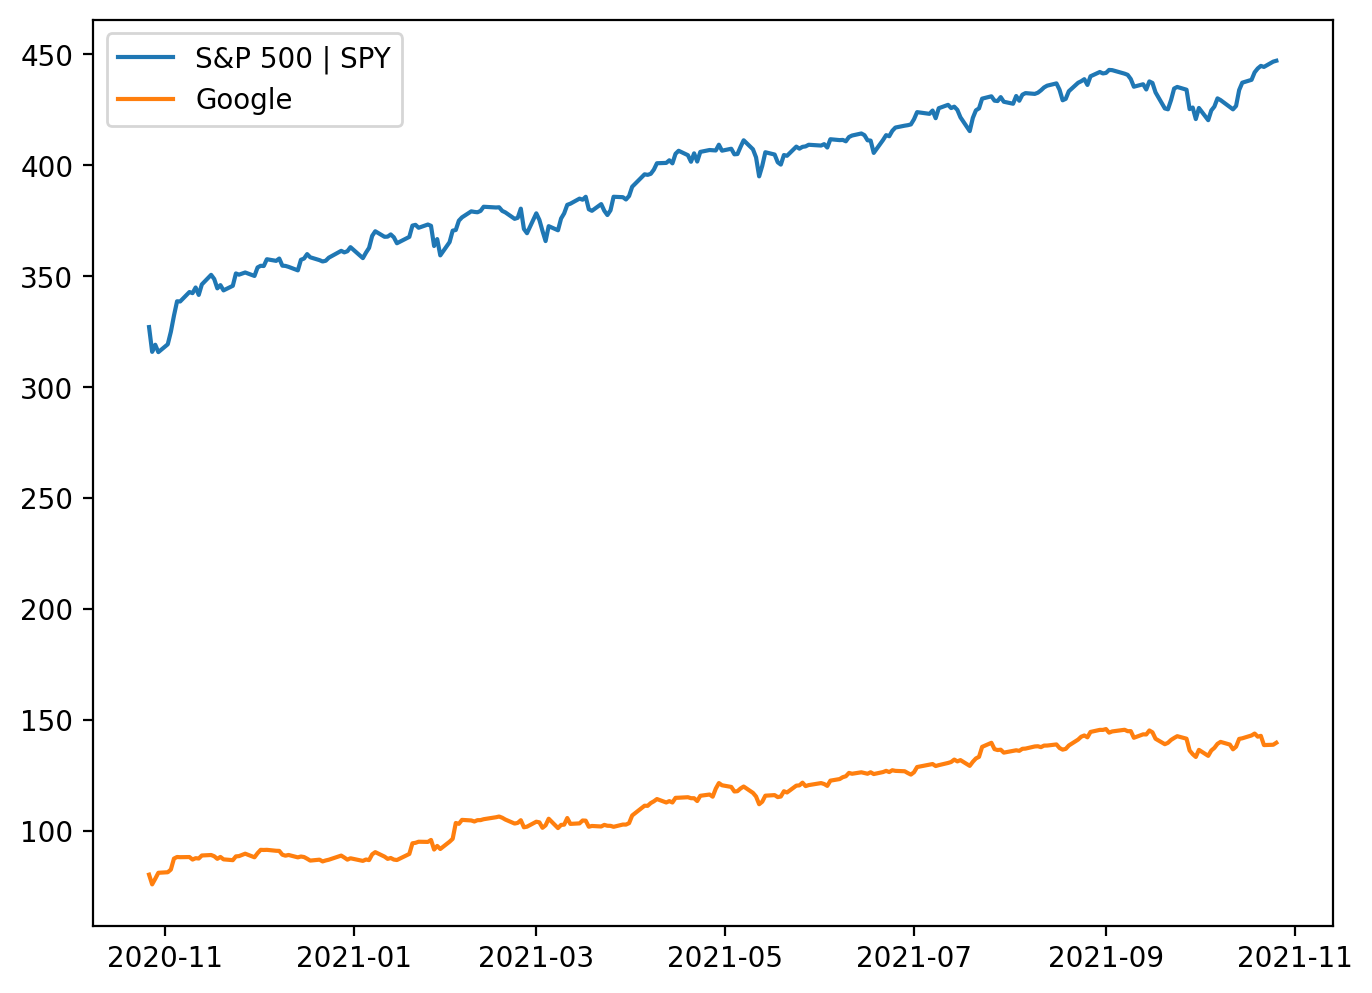

In [5]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = stockData['SPY'] # S&P 500
GOOG = stockData['GOOG'] # Google/Alphabet Class C

plt.plot(SPY, label = "S&P 500 | SPY")
plt.plot(GOOG, label = "Google")
plt.legend()

## 6.  Graph Historical Adjusted Closing Prices of our Two Securities

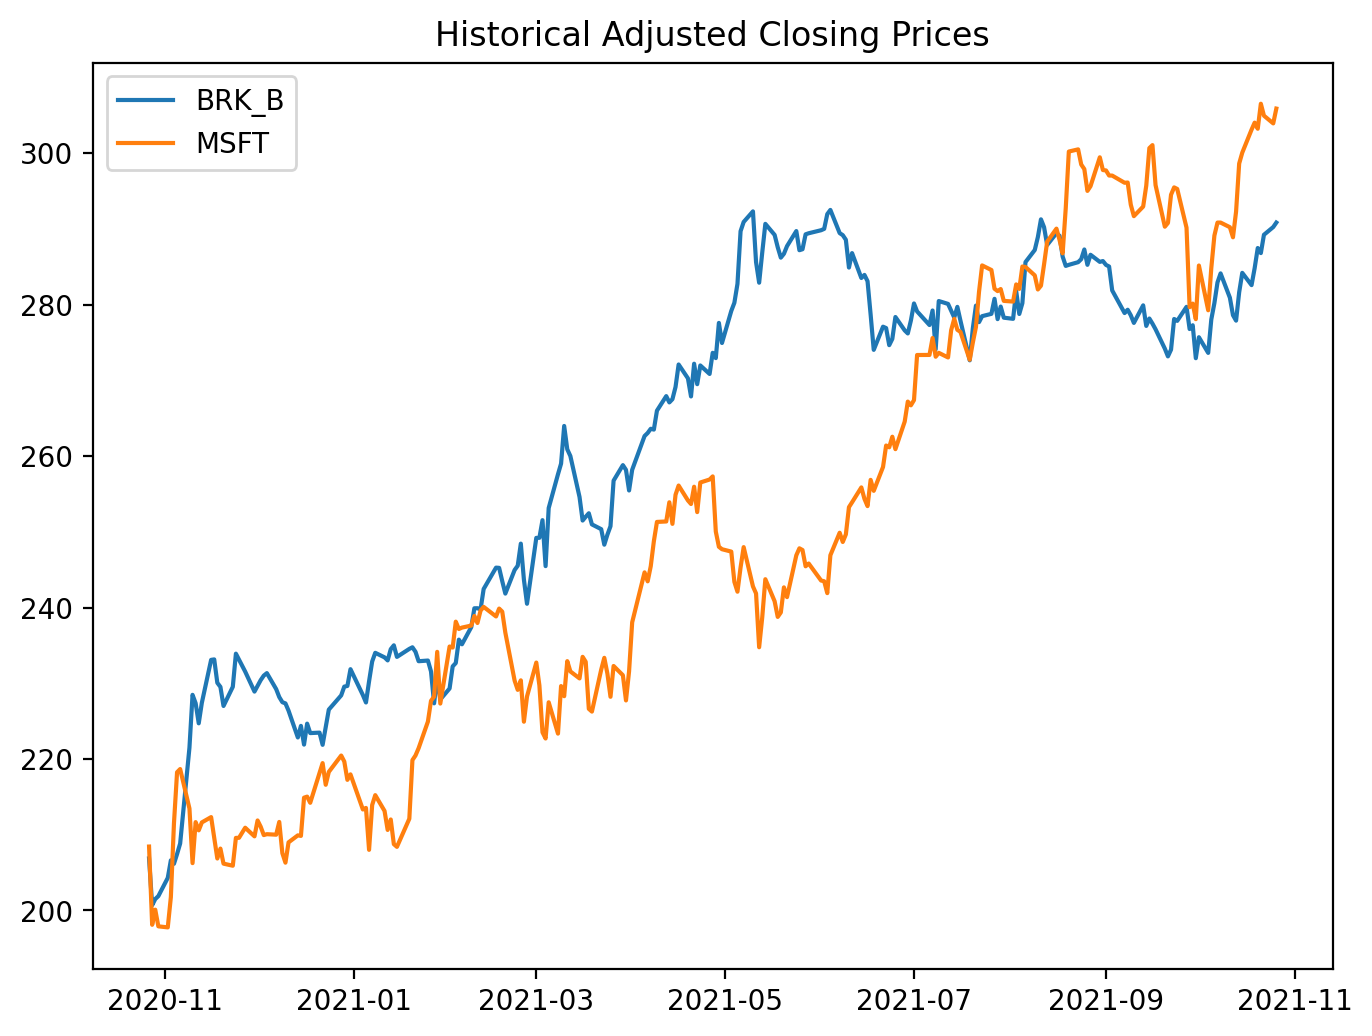

In [6]:
# Correlation of Nike and Apple ~ 0.89.
figure(figsize=(8, 6), dpi=200)
BRK_B = stockData['BRK-B']
MSFT = stockData['MSFT']
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

## 7.  Plot The Spread Between our Two Securties

Text(0.5, 1.0, 'Spread between BRK-B and MSFT')

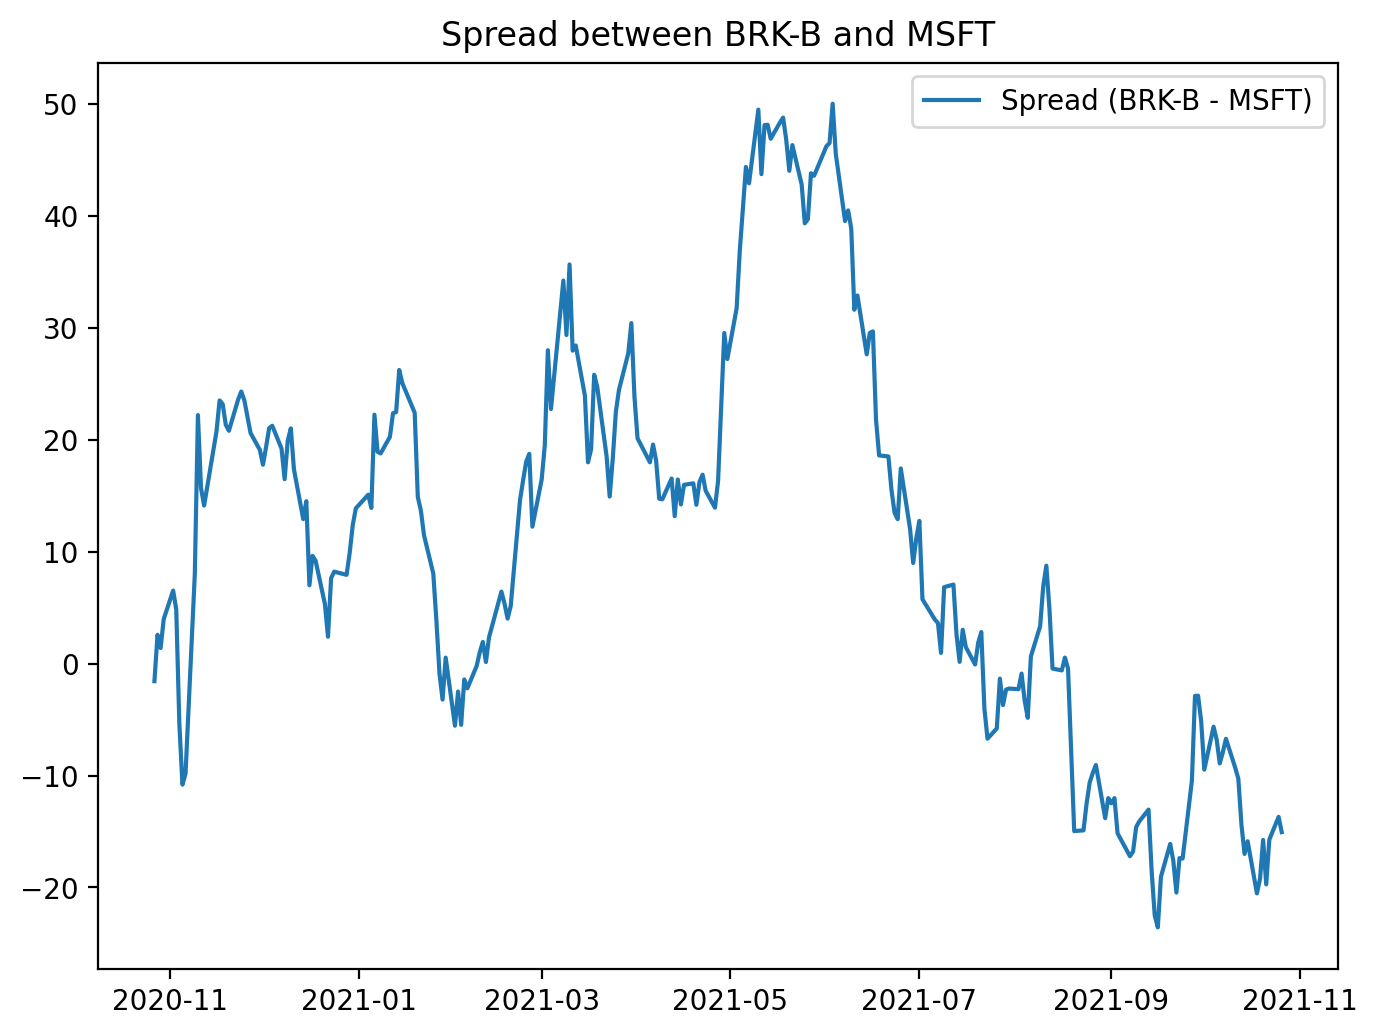

In [7]:

figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between BRK-B and MSFT")

## 8.  Check for Stationary Data - Initiate CoIntegration
#### * cointegration value: Null hyp. = no cointegration

In [8]:

import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

## 9. CoIntegration Test
#### * Cointegration test: technique used to find a potential correlation in a time series (long term)
#### * Determines if the spread between the two assets are constant over time.
#### * Null Hypothesis: Spread between series are non-stationary.
#### * Utilize the augmented Engle-Granger two-step cointegration test.

In [9]:

cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.42666758065024835


## 10.  Compute Augmented Dickey-Fuller Test(ADF)
##### * Compute the ADF test for Berkshire Hathaway and Microsoft
##### * With all time series, we want to have stationary data otherwise our data will be very hard to predict.
##### * ADF for Berkshire Hathaway Class B

In [10]:
from statsmodels.tsa.stattools import adfuller
# ! we are trying to deermine if it staitonary or non-stationary
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])  # * failed the test
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])  # * failed the test
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])  # * passed the test
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])   # * passed the test
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.3736745954764994
P value for the Augmented Dickey-Fuller Test is 0.9132527607871139
P value for the Augmented Dickey-Fuller Test is 0.5523675359189203
P value for the Augmented Dickey-Fuller Test is 0.4440162255895721


## 11.  Price Ratios Comparison
##### * we can take a look at the price ratios between the two time series.


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

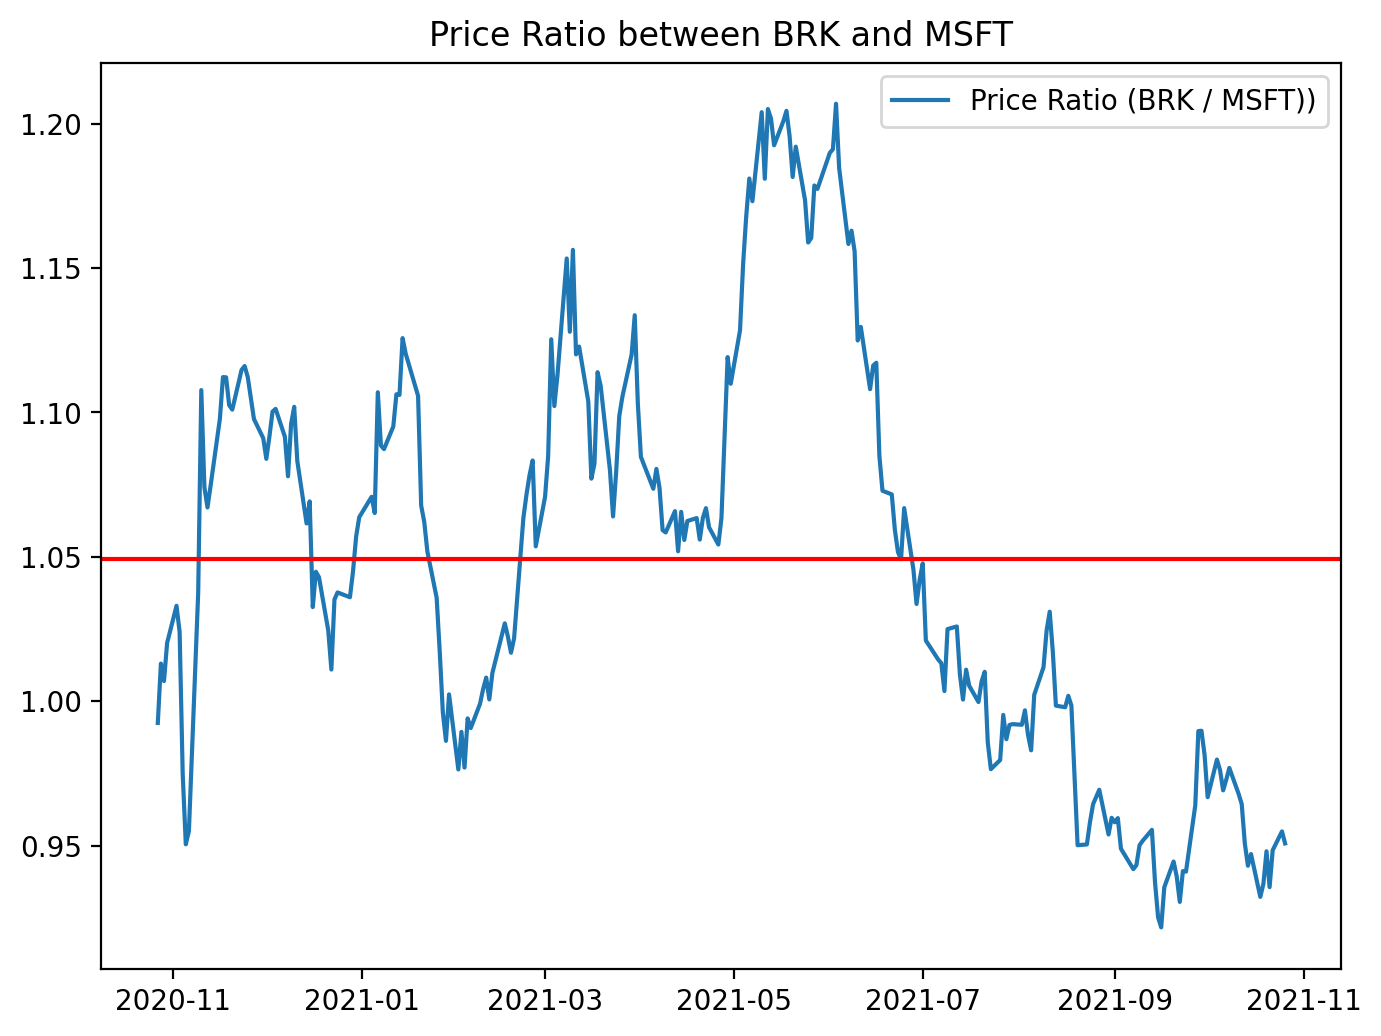

In [11]:

figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

## 12.  Z-Score of Securities
#### * The z-score is based on the given z-score of our price ratio
#### * We can make the assumption that our relationship is stationary and follows a normal distribution as we are given some form of probablity that if a given point were to fall outside of our given bands, then there is a 32% chance that particular observation will fall outside that band and if it falls even more and more, then there is a higher and higher probabilty that that particular point will then slowly diverge to that given staitnoary value
#### * This is where we want to make a trade
#### * The range that exists outside of these 'bands' must come converge back to the mean. Thus, we can determine when you can go long or short the pair (BRK_B to MSFT).

#### * NOTE: You can either use the spread OR the Price ratio approach. I will standardize the ratio so we can have a upper and lower bound to help evaluate our trends.


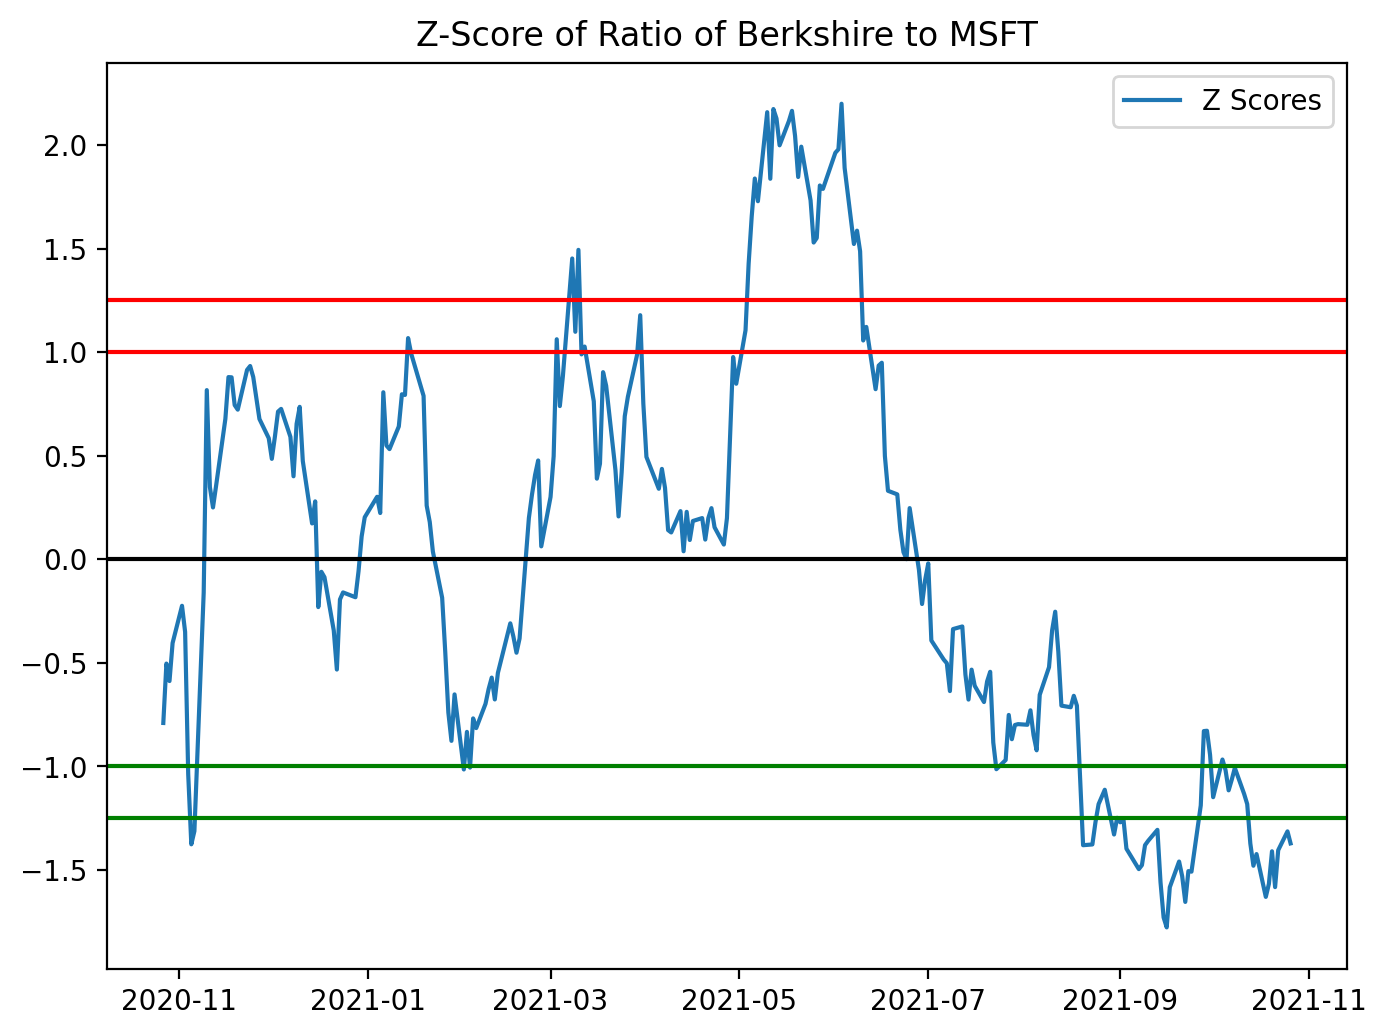

In [12]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()

plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z-Score of Ratio of Berkshire to MSFT')
plt.show()

## 13.  5-Day and 20-Day Moving Averages of Price Ratio of Two Time series.


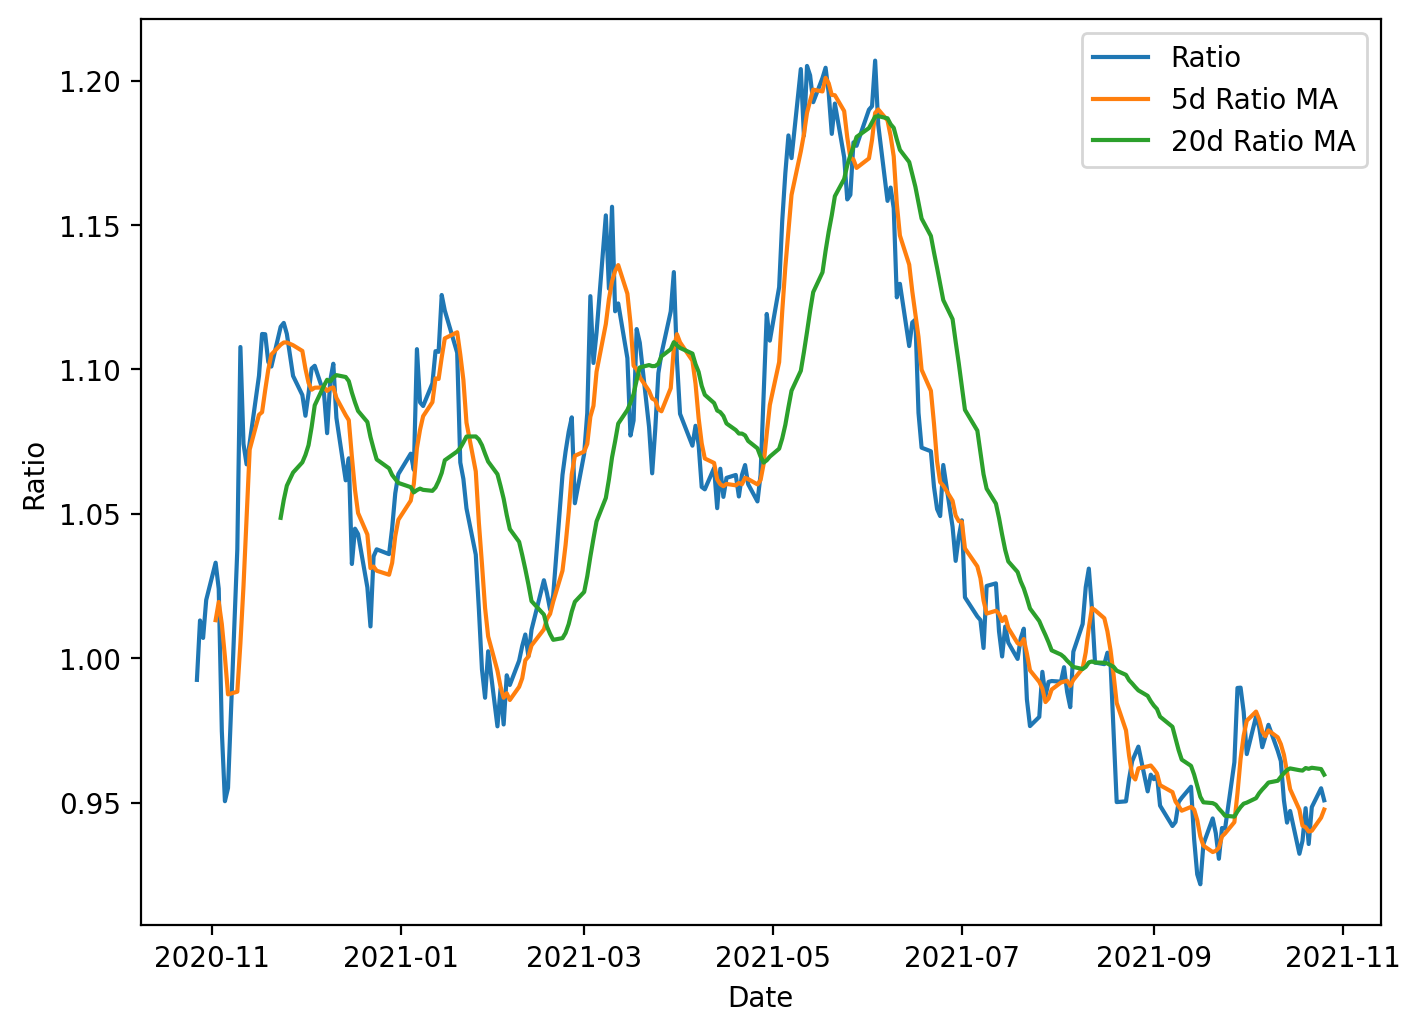

In [13]:

ratio = BRK_B / MSFT
figure(figsize=(8, 6), dpi=200)

# * 5-day Moving Avg 
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()

# * 20-day Moving Avg 
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()

# * standard deviation 
std_20 = ratio.rolling(window=20, center=False).std()

# * Z-Score
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20


plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

## 14.  Rolling Ratio Z-Score

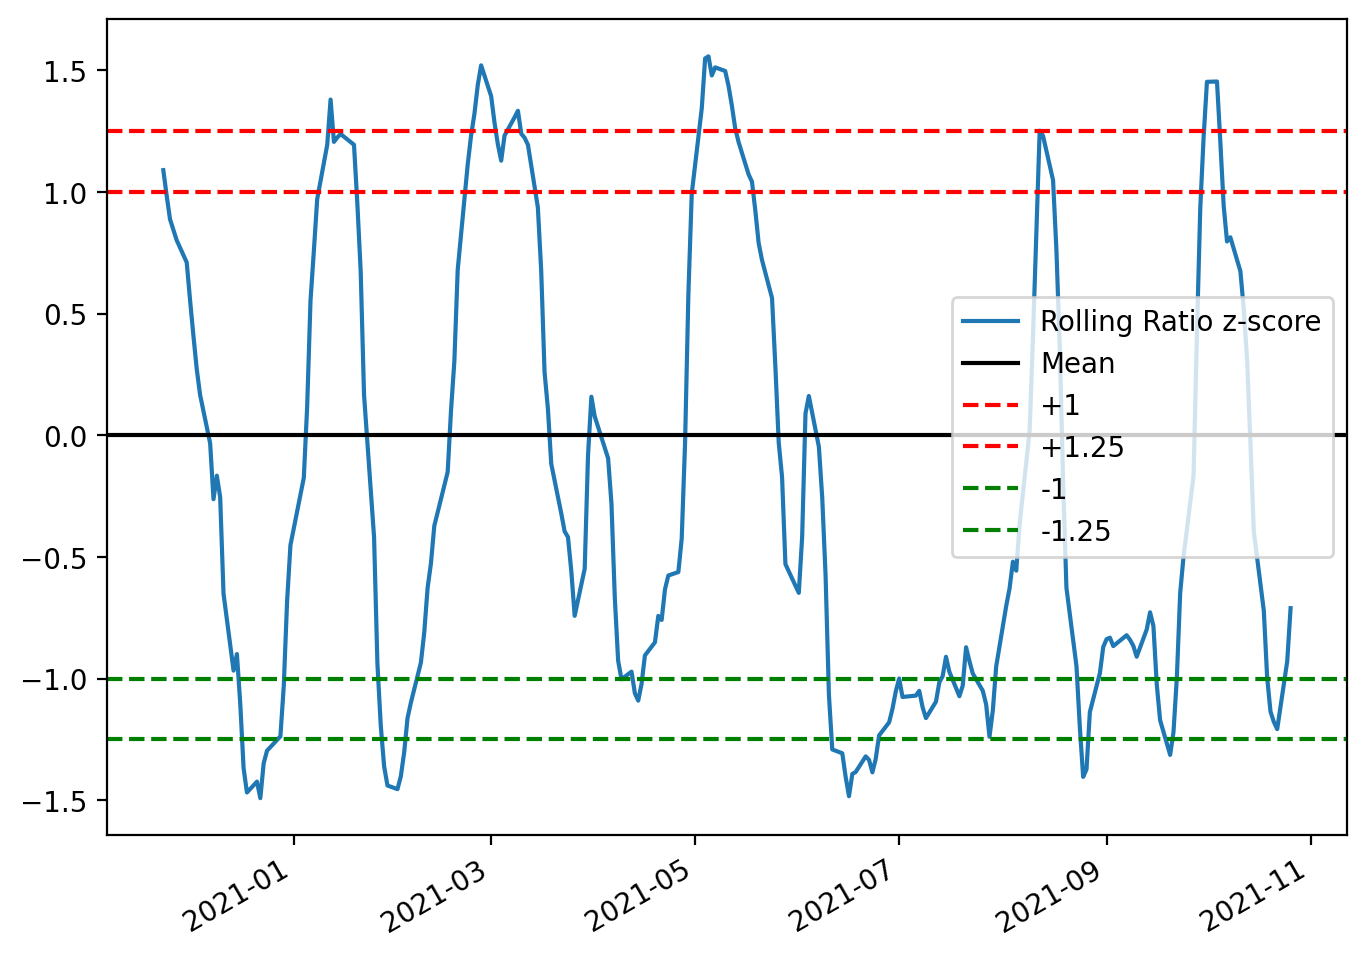

In [14]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

## 15.  Price Ratio Buy and Sell Signal Chart

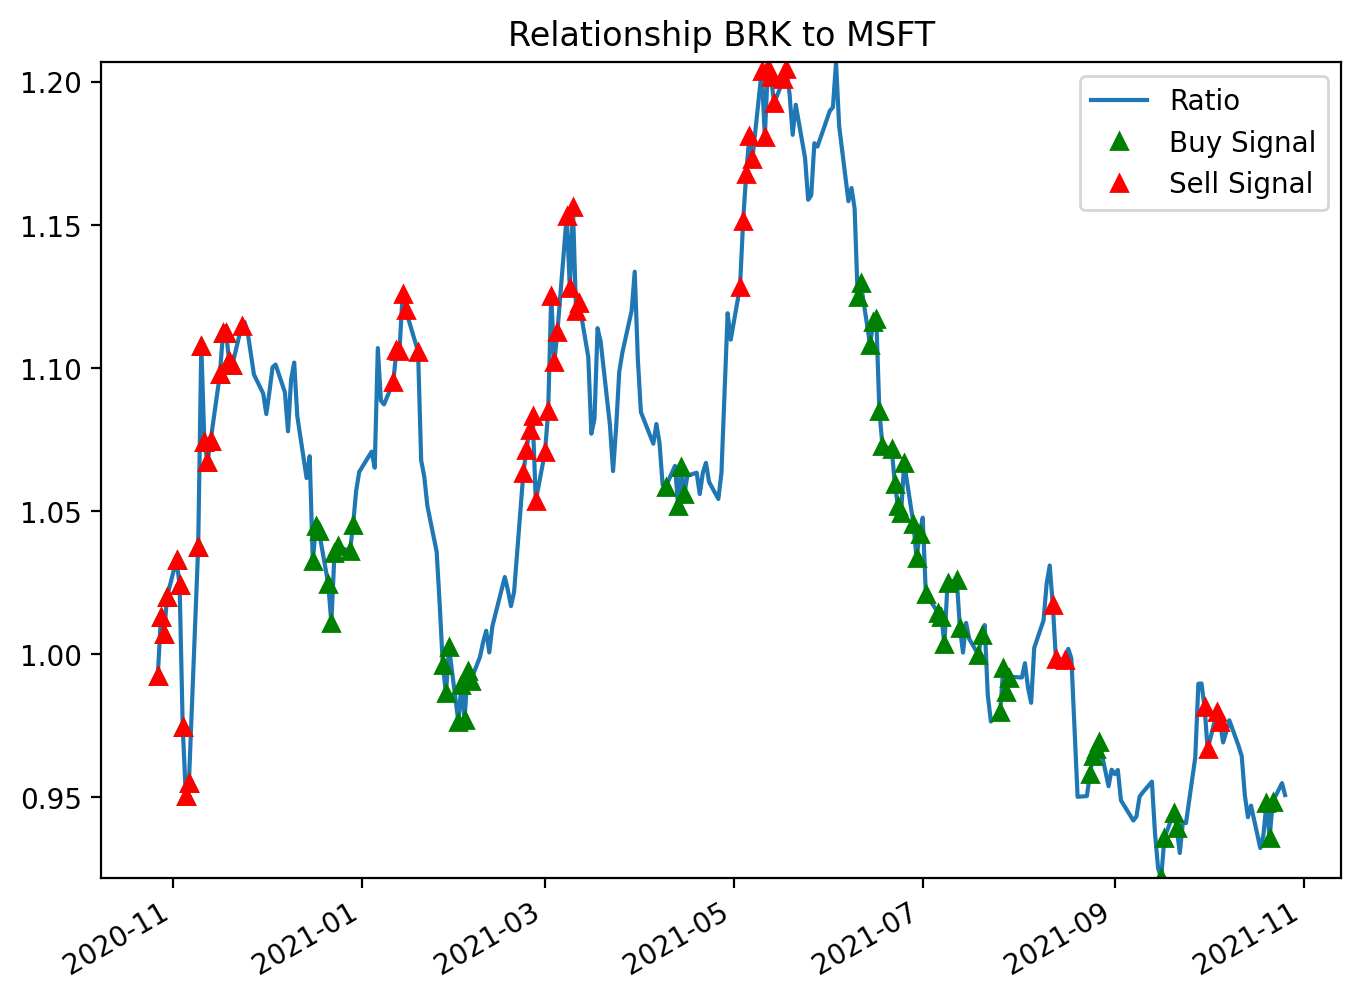

In [15]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()
